# Data Understanding and preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_excel('Leads.xlsx')

# missing values percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display the missing values and their percentages
missing_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [3]:
# Deleting the columns if missing values are greater than 40%, Deleteing the rows if it is less than 2%, for the rest using fillna

# Step 1: Delete specified columns
columns_to_drop = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
df = df.drop(columns=columns_to_drop)

# Step 2: Drop rows with missing values in specified columns
columns_to_check = ['Lead Source', 'TotalVisits', 'Last Activity', 'Page Views Per Visit']
df = df.dropna(subset=columns_to_check)

# Step 3: Fill missing values in the remaining columns
# Filling numerical columns with median and categorical columns with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# missing values percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display the missing values and their percentages
missing_percentage

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [4]:
## Duplicates
df = df.drop_duplicates()

## Outliers
# Example for handling outliers in numerical columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for col in numerical_columns:
    df = remove_outliers(df, col)

# b. Data Cleaning
## Standardize Text Data
df['Do Not Email'] = df['Do Not Email'].str.lower().map({'yes': 1, 'no': 0})
df['Do Not Call'] = df['Do Not Call'].str.lower().map({'yes': 1, 'no': 0})

## Dummy Variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

## New Metrics
# Example: Ratio of time spent on website to total visits
df['Time Per Visit'] = df['Total Time Spent on Website'] / df['TotalVisits']

# print the first five rows
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Prospect ID_0011be30-fa97-465b-8e44-0ae83dff7eed,Prospect ID_0011f23e-9fd9-4256-b316-efc2e2639b0d,Prospect ID_001b0ad3-9096-4af8-8205-912f5c6dafd8,...,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Time Per Visit
0,660737,0,0,0,0.0,0,0.0,False,False,False,...,False,True,False,False,False,False,False,False,False,NaN
1,660728,0,0,0,5.0,674,2.5,False,False,False,...,False,False,False,False,False,False,False,False,False,134.8
2,660727,0,0,1,2.0,1532,2.0,False,False,False,...,False,False,False,False,False,False,False,False,False,766.0
3,660719,0,0,0,1.0,305,1.0,False,False,False,...,False,True,False,False,False,False,False,False,False,305.0
4,660681,0,0,1,2.0,1428,1.0,False,False,False,...,False,True,False,False,False,False,False,False,False,714.0


# EDA

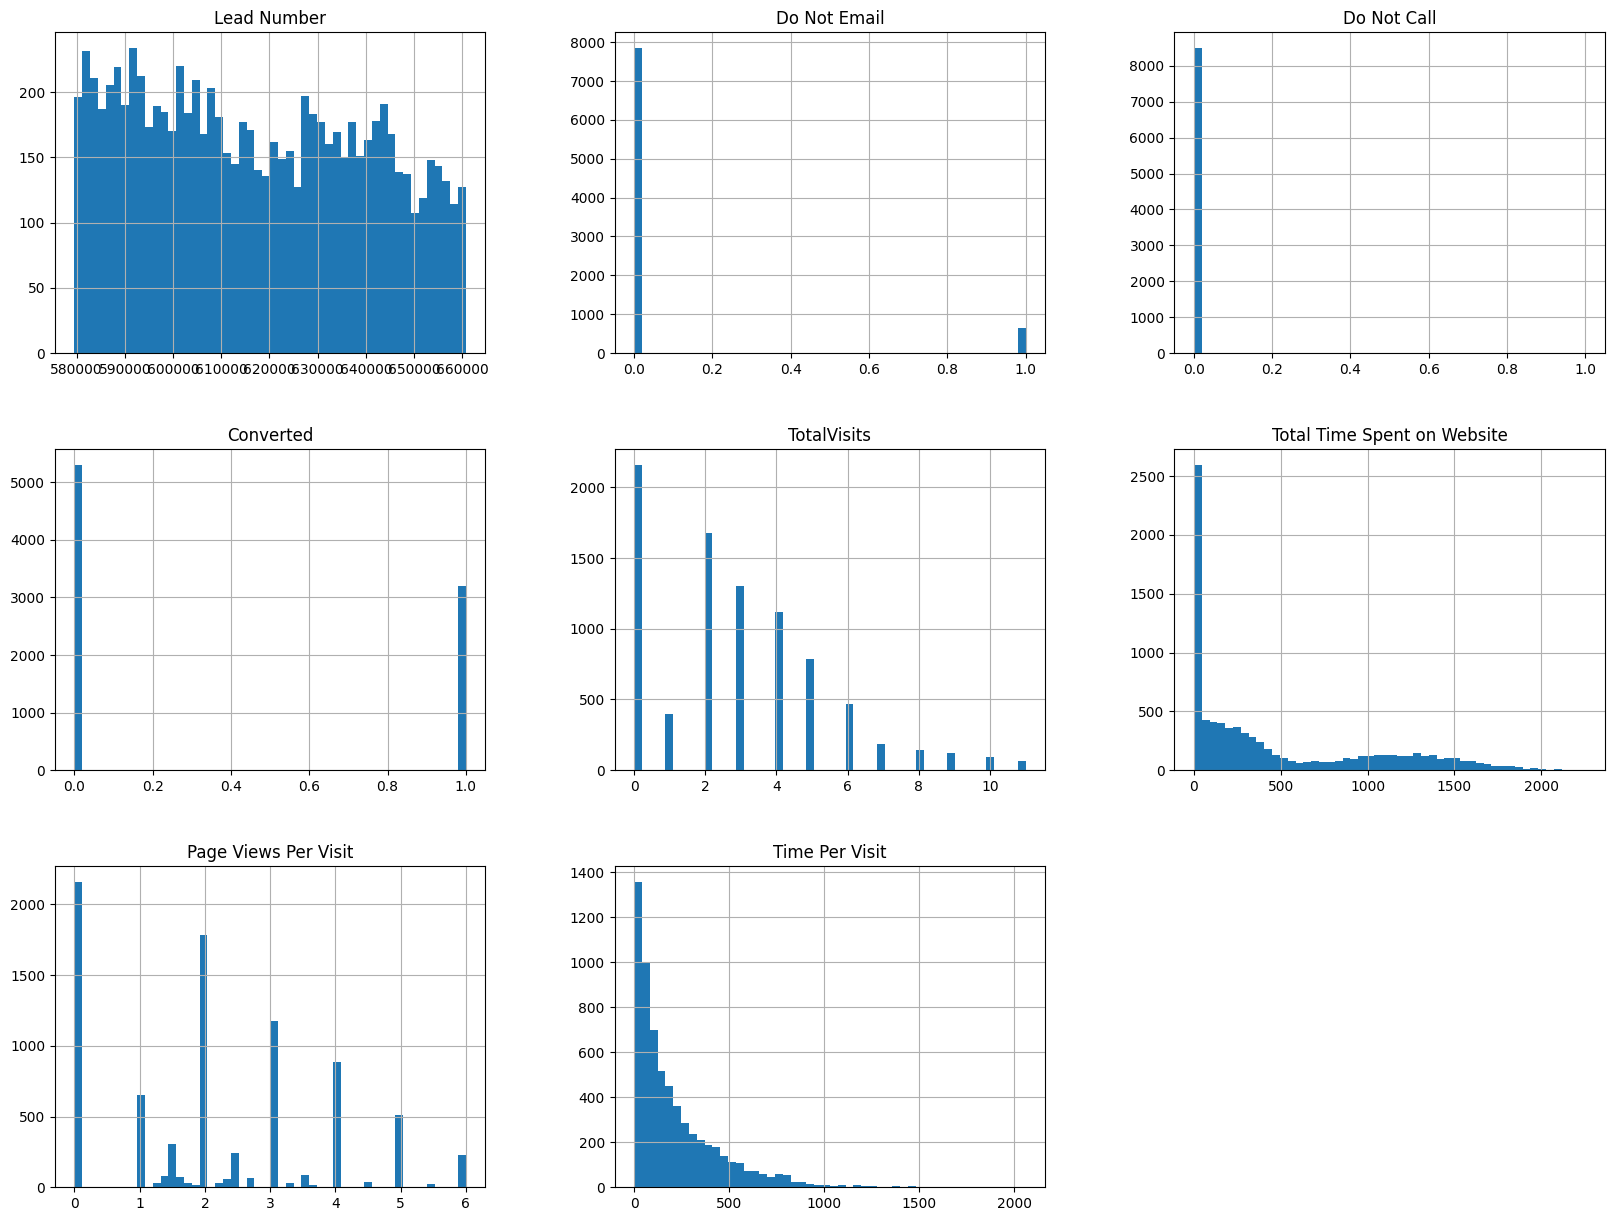

In [5]:
# Univariate Analysis
df.hist(bins=50, figsize=(20,15))
plt.show()

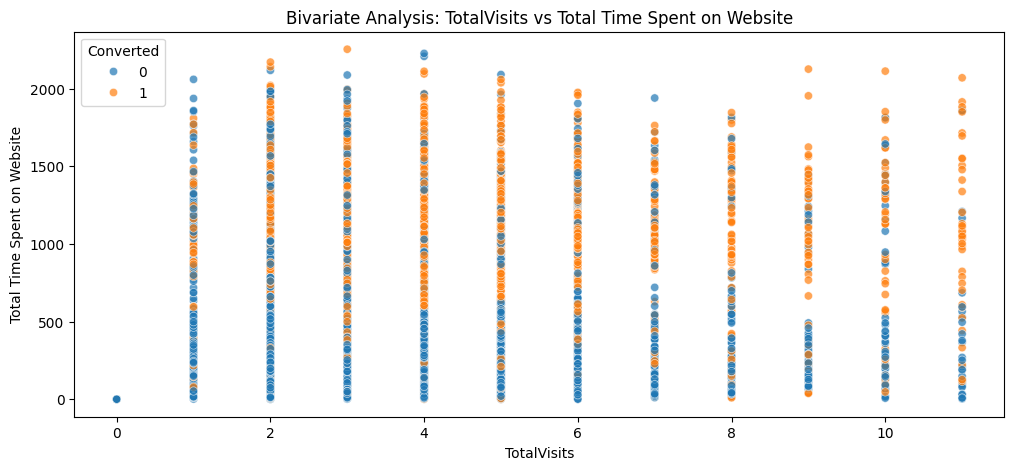

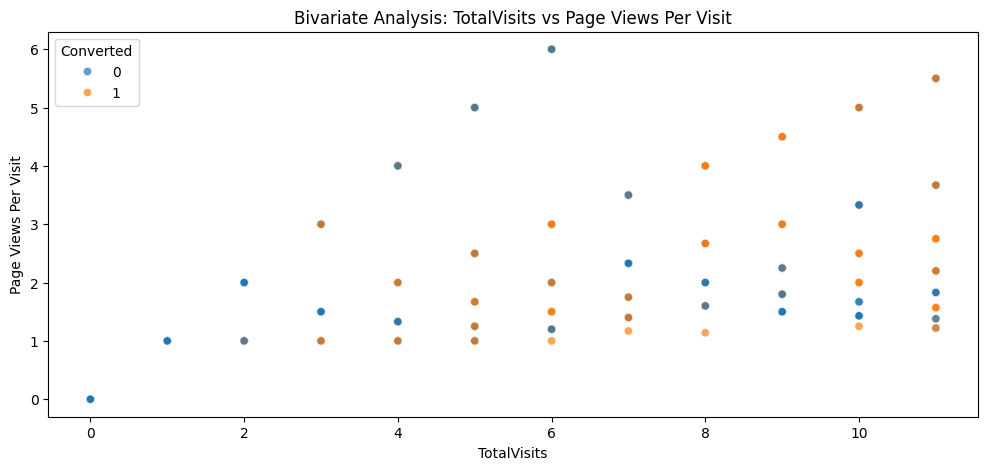

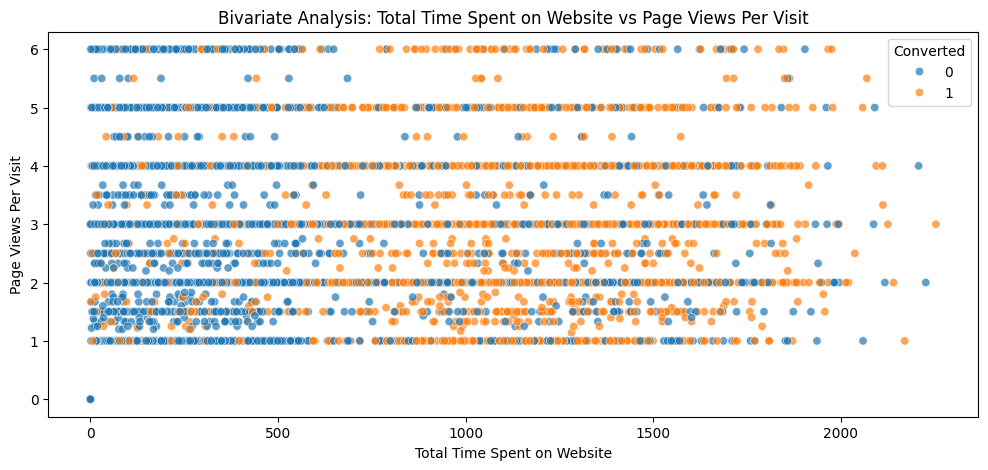

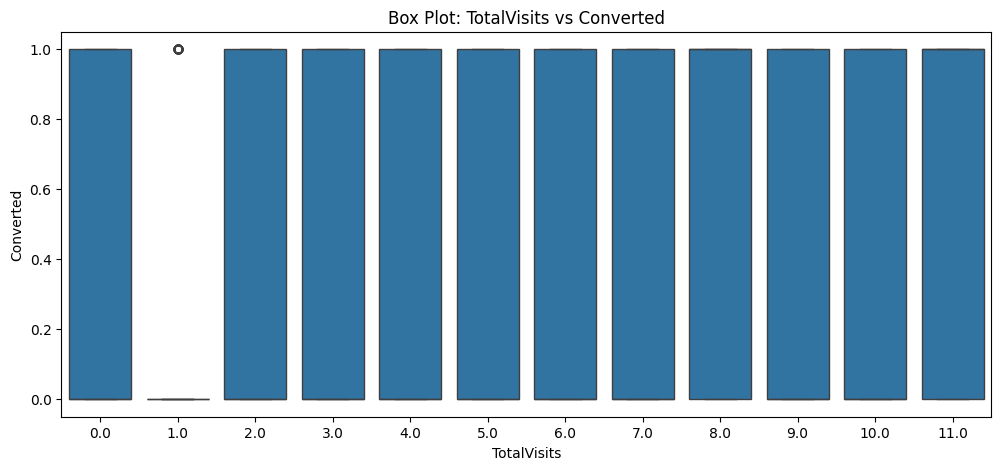

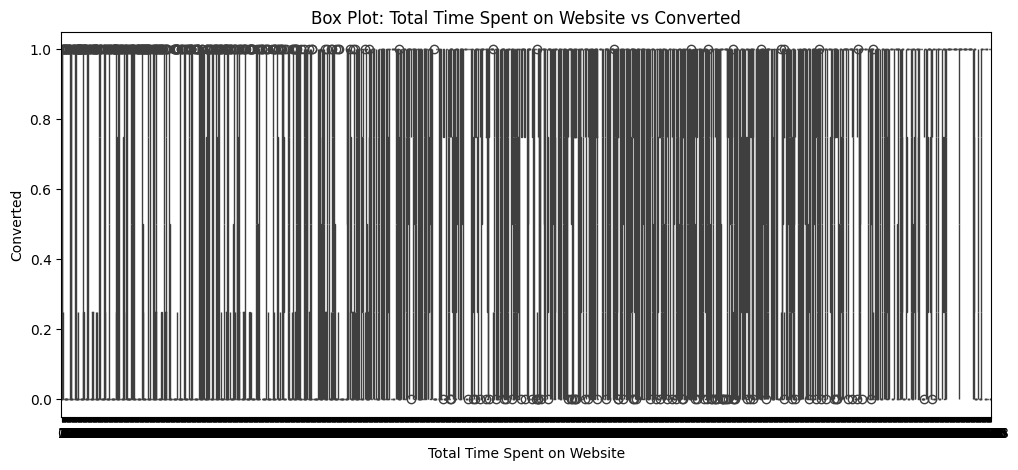

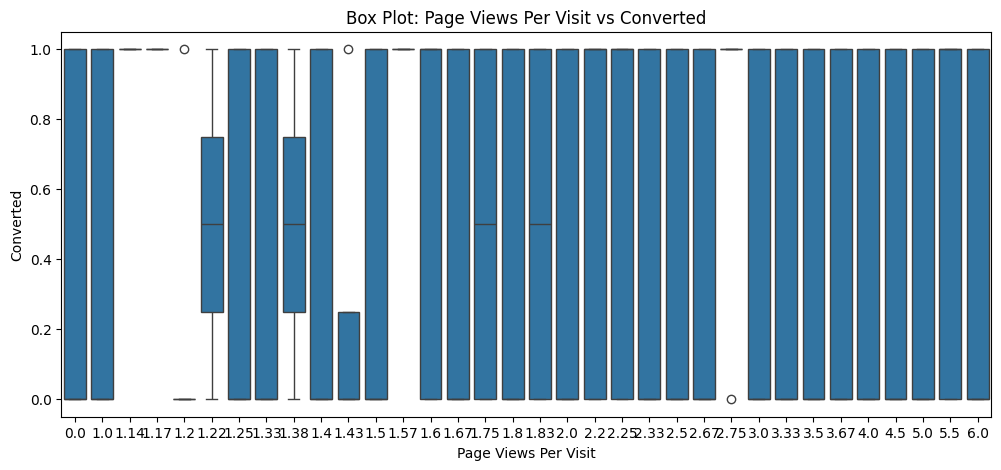

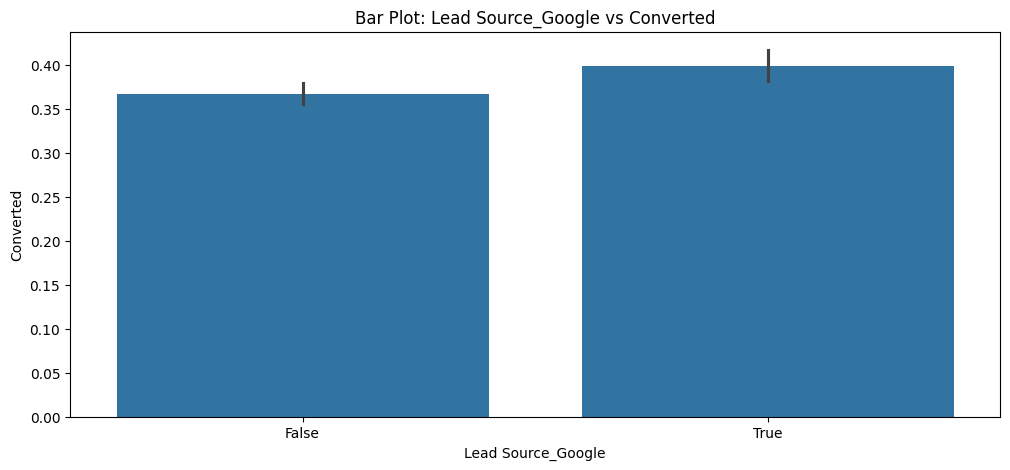

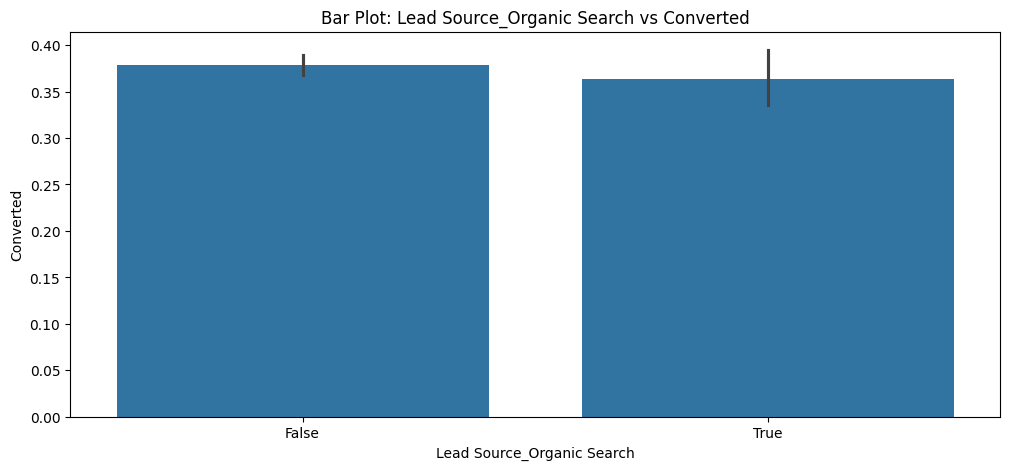

In [6]:
# Define a function to create a bivariate plot
def plot_bivariate(df, x, y, hue='Converted'):
    plt.figure(figsize=(12, 5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, alpha=0.7)
    plt.title(f'Bivariate Analysis: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    plt.show()

# Plot TotalVisits vs Total Time Spent on Website
plot_bivariate(df, 'TotalVisits', 'Total Time Spent on Website')

# Plot TotalVisits vs Page Views Per Visit
plot_bivariate(df, 'TotalVisits', 'Page Views Per Visit')

# Plot Total Time Spent on Website vs Page Views Per Visit
plot_bivariate(df, 'Total Time Spent on Website', 'Page Views Per Visit')

# Define a function to create box plots for categorical and numerical variables
def plot_box(df, x, y='Converted'):
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f'Box Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Box plot for numerical variables against Converted
plot_box(df, 'TotalVisits')
plot_box(df, 'Total Time Spent on Website')
plot_box(df, 'Page Views Per Visit')

# Define a function to create bar plots for categorical variables
def plot_bar(df, x, y='Converted'):
    plt.figure(figsize=(12, 5))
    sns.barplot(data=df, x=x, y=y)
    plt.title(f'Bar Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Example of bar plots for categorical variables
plot_bar(df, 'Lead Source_Google')
plot_bar(df, 'Lead Source_Organic Search')




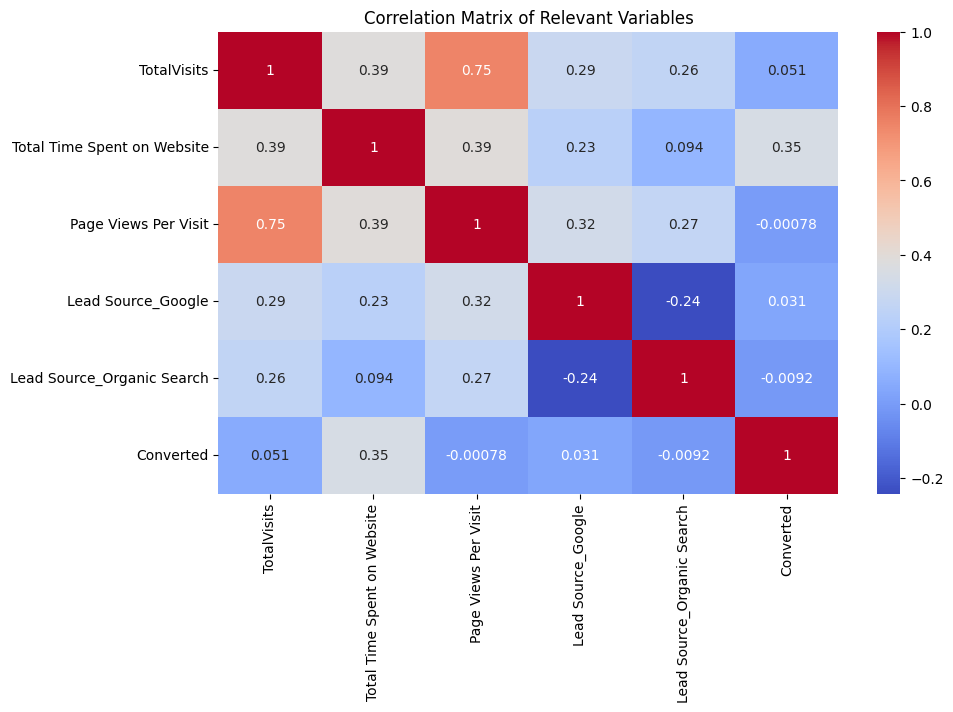

In [7]:
# Select a subset of relevant variables for the correlation matrix
relevant_columns = [
    'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
    'Lead Source_Google', 'Lead Source_Organic Search', 'Converted'
]

# Calculate the correlation matrix for the selected columns
corr_matrix_subset = df[relevant_columns].corr()

# Plot the heatmap for the subset of relevant variables
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Relevant Variables')
plt.show()


# Model Building

In [8]:
# Assuming X contains the feature variables and y contains the target variable
X = df.drop('Converted', axis=1)  # Drop the target variable from the feature set
y = df['Converted']  # Target variable

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median', 'most_frequent', or 'constant'
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=50)

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 6809
Test set size: 1703


In [9]:
# Instantiate the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall: .2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')


Accuracy: 0.90
Precision: 0.91
Recall:  0.82
F1 Score: 0.87
ROC-AUC Score: 0.96


C:\Users\adithya.mm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Intrepretation

In [10]:
# Get feature importance from the model's coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})

# Sort features by their importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Top 5 Most Important Features:")
print(feature_importance.head(5))


Top 5 Most Important Features:
                                       Feature  Importance
8649  Tags_Will revert after reading the email    2.721598
8640                         Tags_Lost to EINS    2.585255
8632                   Tags_Closed by Horizzon    2.560558
8664                               City_Select    2.150955
8518                 Lead Origin_Lead Add Form    1.910388


In [11]:
print("Top 5 Dummy variables:")
print(feature_importance.tail(5))

Top 5 Dummy variables:
                                         Feature  Importance
8548       Last Activity_Olark Chat Conversation   -1.056819
8607                       Specialization_Select   -1.071954
8638            Tags_Interested in other courses   -1.132001
8623  What is your current occupation_Unemployed   -1.345384
8644                                Tags_Ringing   -2.985312


In [12]:
aggressive_recommendation = """
During the period when interns are available, the sales team should focus on:
1. Prioritizing all leads predicted as 1 by the logistic regression model.
2. Increasing the frequency of follow-up calls and emails to these leads.
3. Offering special promotions or discounts to encourage conversion.
4. Providing additional training to interns to handle more leads efficiently.
"""
print(aggressive_recommendation)



During the period when interns are available, the sales team should focus on:
1. Prioritizing all leads predicted as 1 by the logistic regression model.
2. Increasing the frequency of follow-up calls and emails to these leads.
3. Offering special promotions or discounts to encourage conversion.
4. Providing additional training to interns to handle more leads efficiently.



In [13]:
minimize_calls_recommendation = """
When the targets are met early, the sales team should:
1. Focus only on leads with a high probability of conversion (e.g., predicted probability > 0.8).
2. Reduce the frequency of follow-up calls and rely more on automated emails.
3. Reallocate resources to other tasks such as lead nurturing, content creation, or training.
4. Monitor and adjust the threshold based on the current lead conversion performance.
"""
print(minimize_calls_recommendation)



When the targets are met early, the sales team should:
1. Focus only on leads with a high probability of conversion (e.g., predicted probability > 0.8).
2. Reduce the frequency of follow-up calls and rely more on automated emails.
3. Reallocate resources to other tasks such as lead nurturing, content creation, or training.
4. Monitor and adjust the threshold based on the current lead conversion performance.



# Graphs

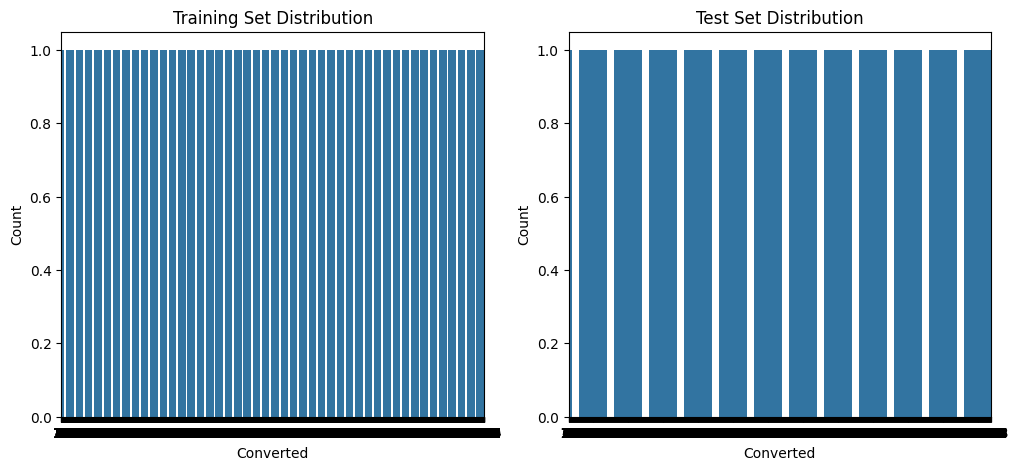

In [14]:
# Split the data
X = df.drop('Converted', axis=1)
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Plot the distribution of the target variable in training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(y_train, ax=ax[0])
ax[0].set_title('Training Set Distribution')
ax[0].set_xlabel('Converted')
ax[0].set_ylabel('Count')

sns.countplot(y_test, ax=ax[1])
ax[1].set_title('Test Set Distribution')
ax[1].set_xlabel('Converted')
ax[1].set_ylabel('Count')

plt.show()


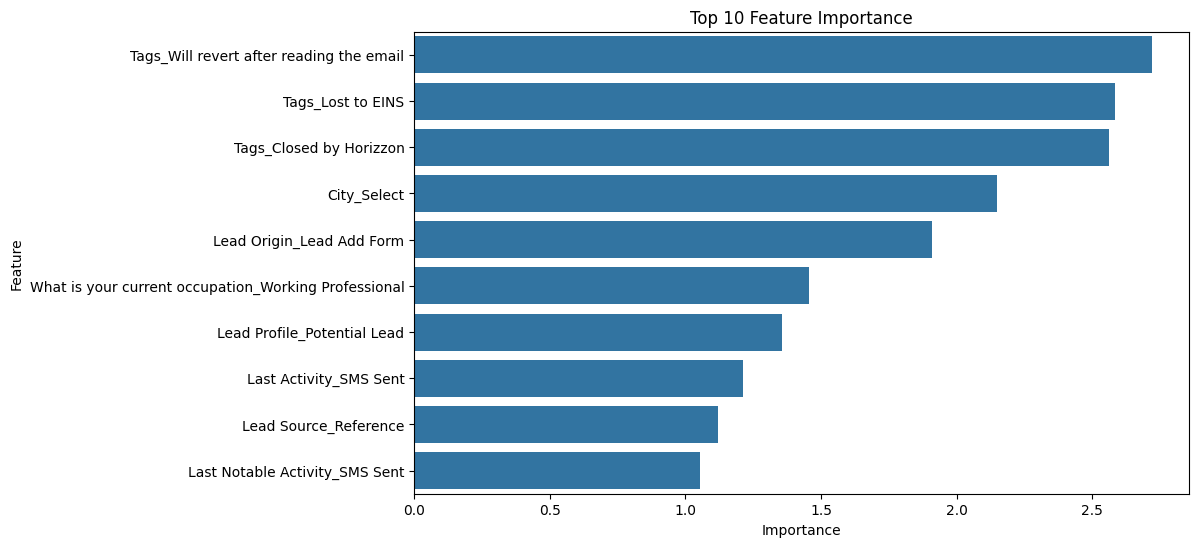

In [15]:
# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.show()


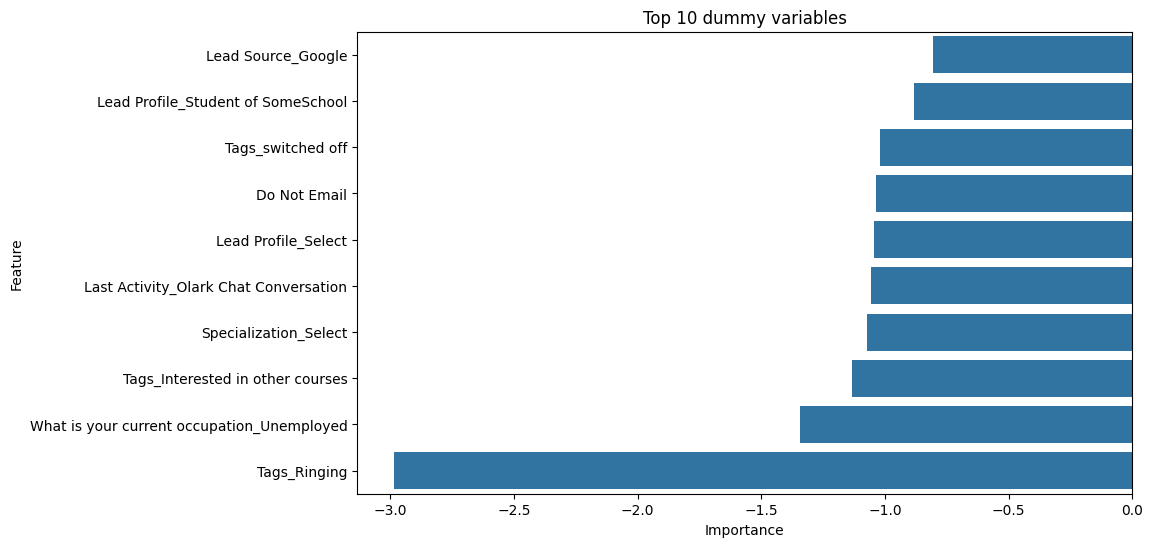

In [16]:
# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.tail(10))
plt.title('Top 10 dummy variables')
plt.show()
